In [1]:
import pandas as pd
import numpy as np
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import zipfile
import os
from io import BytesIO

In [2]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [4]:
def extract_and_load_images(zip_file_path, transform):
    images = {"RGB": [], "thermal": []}  # separate image domains
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for file_name in zip_ref.namelist():
            if file_name.endswith('.jpg'):
                directory = os.path.dirname(file_name)
                image_type = "thermal" if "thermal-face-128x128" in directory else "RGB"
                
                # print(f"Processing: {file_name}, directory: {directory}, image_type: {image_type}")
                
                with zip_ref.open(file_name) as file:
                    image = Image.open(BytesIO(file.read())).convert('RGB')
                    image = transform(image)
                    images[image_type].append(image)
    return images

In [5]:
zip_file_path = '../data/raw/face Dataset.zip'
images = extract_and_load_images(zip_file_path, transform)

In [6]:
print(f"Number of RGB images loaded: {len(images['RGB'])}")
print(f"Number of thermal images loaded: {len(images['thermal'])}")

Number of RGB images loaded: 1532
Number of thermal images loaded: 1532


In [7]:
def visualize_image(image_tensor, title=None):
    # Unnormalize the image
    image_tensor = image_tensor * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    # Clamp values to ensure they are between 0 and 1
    image_tensor = torch.clamp(image_tensor, 0, 1)
    image_tensor = image_tensor.permute(1, 2, 0).numpy()
    
    plt.imshow(image_tensor)
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

In [8]:
rgb_images = images['RGB']
thermal_images = images['thermal']

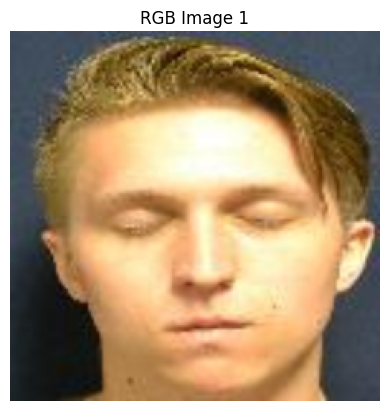

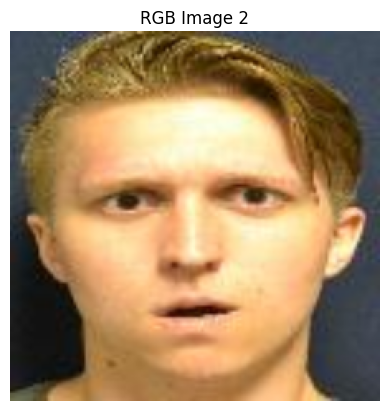

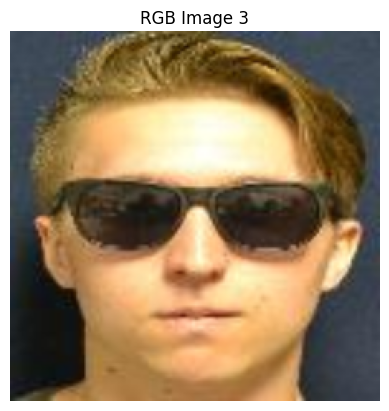

In [9]:
# Visualize RGB
for i, img_tensor in enumerate(rgb_images[-3:]):  
    visualize_image(img_tensor, title=f'RGB Image {i+1}')

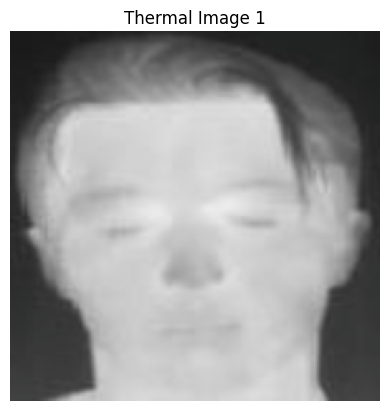

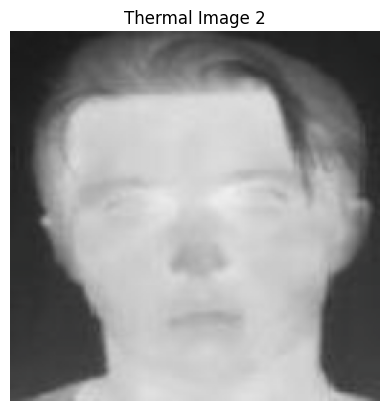

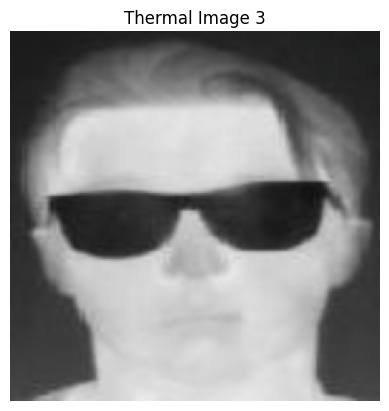

In [10]:
# Visualize Thermal 
for i, img_tensor in enumerate(thermal_images[-3:]):
    visualize_image(img_tensor, title=f'Thermal Image {i+1}')